In [1]:
from keras.datasets import mnist
import seaborn as sns
import collections

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from io import StringIO
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import plotly.graph_objects as go
import plotly.offline as offline

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn

# Visualization libraries
import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image 

2023-05-14 10:29:09.540305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 10:29:09.652640: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-14 10:29:10.758269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-14 10:29:10.758329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



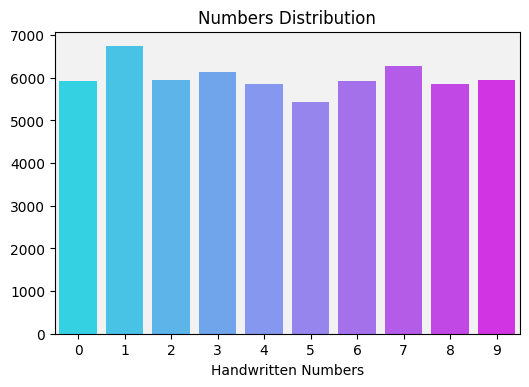

In [2]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

value_count_training = collections.Counter(training_dataset_y)

fig, ax0 = plt.subplots(1, 1, dpi=100)
ax = sns.barplot(list(value_count_training.keys()), list(value_count_training.values()), palette='cool')
ax.set_xlabel('Handwritten Numbers')
ax.set_title("Numbers Distribution")
plt.show();
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28) 
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

In [3]:
training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [4]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

In [5]:
### MLP
model = Sequential()
model.add(Dense(512, input_dim=28 * 28, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

2023-05-14 10:29:15.255140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 10:29:15.283770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 10:29:15.285238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 10:29:15.286329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
101/750 [===>..........................] - ETA: 0s - loss: 0.5532 - accuracy: 0.8417

2023-05-14 10:29:17.207872: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


750/750 [==============================] - 2s 2ms/step - loss: 0.2214 - accuracy: 0.9341 - val_loss: 0.1190 - val_accuracy: 0.9638
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9742 - val_loss: 0.0985 - val_accuracy: 0.9700
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0798 - val_accuracy: 0.9755
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0824 - val_accuracy: 0.9755
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0977 - val_accuracy: 0.9747
CPU times: user 9.67 s, sys: 1.11 s, total: 10.8 s
Wall time: 7.79 s


In [7]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9747
loss = 0.08899293094873428, accuracy = 0.9746999740600586


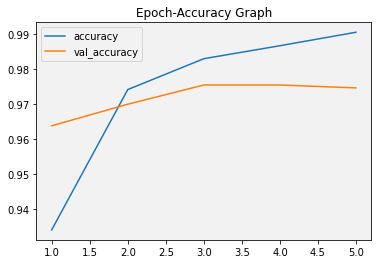

In [8]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [9]:
######## CNN #######
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

training_dataset_x /= 255
test_dataset_x /= 255

In [10]:
training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling2  (None, 13, 13, 32)       0         
 D)                                                              
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling2  (None, 5, 5, 64)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)              

In [12]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5


2023-05-14 10:29:25.453120: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8301


  1/750 [..............................] - ETA: 16:25 - loss: 2.3111 - accuracy: 0.0781

2023-05-14 10:29:26.259511: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-05-14 10:29:26.261072: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2023-05-14 10:29:26.261101: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-05-14 10:29:26.261187: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


750/750 [==============================] - 3s 3ms/step - loss: 0.1905 - accuracy: 0.9424 - val_loss: 0.0801 - val_accuracy: 0.9761
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0364 - val_accuracy: 0.9898
CPU times: user 13.6 s, sys: 1.14 s, total: 14.8 s
Wall time: 11.2 s


In [13]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9882
loss = 0.03315525874495506, accuracy = 0.9882000088691711


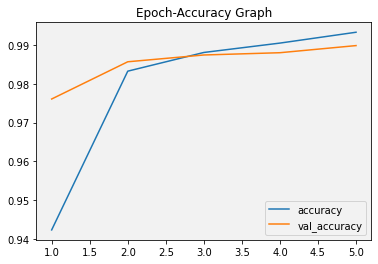

In [14]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [15]:
seed = 1234
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [16]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float: return round(accuracy_score(y_true, y_pred) * 100, 2)

In [17]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

training_dataset_x = training_dataset_x.reshape(-1, 28, 28, 1)
test_dataset_x = test_dataset_x.reshape(-1, 28, 28, 1)

training_dataset_x = training_dataset_x.astype('float32')
test_dataset_x = test_dataset_x.astype('float32')

training_dataset_x = training_dataset_x.reshape(-1, 28*28)
test_dataset_x = test_dataset_x.reshape(-1, 28*28)

In [18]:
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

In [19]:
tsvd = TruncatedSVD(n_components=50).fit_transform(training_dataset_x.reshape(-1, 28*28))

In [20]:
# Fit t-SNE on the Truncated SVD reduced data (50 features)
tsne = TSNE()
%time transformed = tsne.fit_transform(tsvd)
# Split up the t-SNE results in training and testing data
tsne_train = pd.DataFrame(transformed[:50000], columns=['component1', 'component2'])
tsne_test = pd.DataFrame(transformed[50000:], columns=['component1', 'component2'])

CPU times: user 16min 53s, sys: 26 s, total: 17min 19s
Wall time: 1min 15s


/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



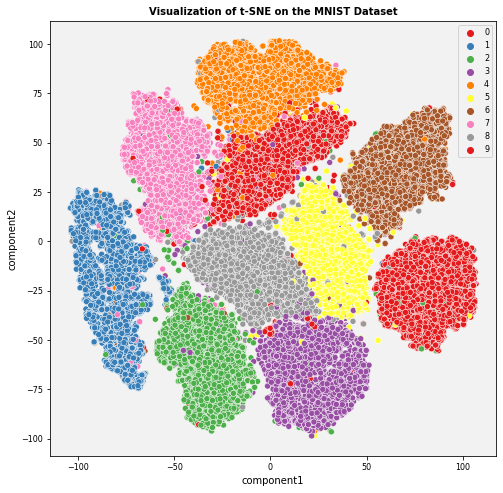

In [21]:
# Visualize the results for t-SNE on MNIST
plt.figure(figsize=(8, 8))
plt.title(f"Visualization of t-SNE on the MNIST Dataset", fontsize=10, weight='bold')
sns.scatterplot("component1", "component2", 
                data=tsne_train, hue=training_dataset_y[:50000], 
                palette="Set1", legend="full")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

In [22]:
# PCA
ratios = []
optimal_feature = None
for i in range(100):
    pca = PCA(n_components=i)
    pca.fit(training_dataset_x.reshape(-1, 28*28))
    ratios.append(np.sum(pca.explained_variance_ratio_))
    if not optimal_feature and ratios[-1] >= 0.80:
        optimal_feature = i
    print('{}---> {}'.format(i, ratios[-1]))

0---> 0.0
1---> 0.09704664359645189
2---> 0.16800588402054284
3---> 0.22969677061873112
4---> 0.28359096617552354
5---> 0.3322789347825074
6---> 0.37540124852365647
7---> 0.4081205381158662
8---> 0.43695948563596265
9---> 0.464579776687599
10---> 0.4881497453059955
11---> 0.50924161946909
12---> 0.5294713165652474
13---> 0.5466294789430266
14---> 0.5635502093023821
15---> 0.5793344516689977
16---> 0.5941657475585553
17---> 0.6074110897576931
18---> 0.6201640839178676
19---> 0.6320491852727781
20---> 0.6435741737284776
21---> 0.6542348856634423
22---> 0.6642949089202815
23---> 0.6738384565591574
24---> 0.6829681183711622
25---> 0.6917997291228777
26---> 0.7001916230112537
27---> 0.7083161986823819
28---> 0.7161817805940885
29---> 0.7236227997048719
30---> 0.7305410253139493
31---> 0.7371135430869049
32---> 0.743585792728263
33---> 0.7496199765740184
34---> 0.7554491831162045
35---> 0.7611740930144348
36---> 0.7666303294828904
37---> 0.7716748616659929
38---> 0.776556666613085
39---> 0.7

In [23]:
data_x = training_dataset_x.copy()
data_y = training_dataset_y.copy()

val_data_x = test_dataset_x.copy()
val_data_y = test_dataset_y.copy()

In [24]:
import plotly.offline as offline
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_std = StandardScaler().fit_transform(data_x.reshape(-1, 28*28))

# Call the PCA method with 2 components. 
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)

data = [go.Scatter(
    x=x_2[:, 0],
    y=x_2[:, 1],
    mode='markers',
    showlegend=False,
    marker=dict(
        size=8,
        color=data_y,
        colorscale='Rainbow',
        showscale=False,
        line=dict(
            width=2,
            color='rgb(255, 255, 255)'
        )
    ),
    opacity=0.8
)]

layout = go.Layout(
    title='Principal Component Analysis (PCA)',
    hovermode='closest',
    xaxis=dict(
        title='First Principal Component',
        ticklen=8,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Second Principal Component',
        ticklen=8,
        gridwidth=2,
    ),
    showlegend=True
)

fig = dict(data=data, layout=layout)


offline.plot(fig, filename='plots/PCA_plot.html')


'plots/PCA_plot.html'

In [25]:
kmeans = KMeans(n_clusters=10)
kmeans_10 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x=x_2[:, 0], 
        y=x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color=kmeans_10,
            colorscale='Rainbow',
            showscale=False, 
            line=dict(
                width=2,
                color='rgb(255, 255, 255)'
            )
        )
    )
]

layout = go.Layout(
    title='KMeans Clustering',
    hovermode='closest',
    xaxis=dict(
        title='First Principal Component',
        ticklen=8,
        zeroline=False,
        gridwidth=2
    ),
    yaxis=dict(
        title='Second Principal Component',
        ticklen=8,
        gridwidth=2
    ),
    showlegend=True
)

fig = dict(data=data, layout=layout)

offline.plot(fig, filename='plots/kmeans_plot.html')


/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



'plots/kmeans_plot.html'

In [26]:
lda = LDA(n_components=2)

x_lda = lda.fit_transform(data_x.reshape(-1, 28*28), data_y)

data = [
    go.Scatter(
        x=x_lda[:, 0],
        y=x_lda[:, 1],
        mode='markers',
        showlegend=True,
        marker=dict(
            size=8,
            color=data_y,
            colorscale='Rainbow',
            showscale=False,
            opacity=0.8,
            line=dict(
                width=2,
                color='rgb(255, 255, 255)'
            )
        )
    )
]

layout = go.Layout(
    title='Linear Discriminant Analysis (LDA)',
    hovermode='closest',
    xaxis=dict(
        title='First Linear Discriminant',
        ticklen=8,
        zeroline=False,
        gridwidth=2
    ),
    yaxis=dict(
        title='Second Linear Discriminant',
        ticklen=8,
        gridwidth=2
    ),
    showlegend=False
)

fig = dict(data=data, layout=layout)

offline.plot(fig, filename='plots/lda_plot.html')

'plots/lda_plot.html'

In [27]:
# Invoking the t-SNE method
tsne = TSNE()
x_tsne = tsne.fit_transform(data_x[:20000].reshape(-1, 28*28))

# Plot TSNE graph
data = [
    go.Scatter(
    x = x_tsne[:,0],
    y = x_tsne[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
offline.plot(fig, filename='plots/TSNE_plot')

/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `plots/TSNE_plot` didn't end with .html. Adding .html to the end of your file.



'plots/TSNE_plot.html'